<a href="https://colab.research.google.com/github/AyeshaJavaid676/DataAnalysis/blob/main/Ayesha_Javaid_Deep_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Obesity.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,14.0,Male,1.71,72.0,no,yes,3.0,3.0,no,no,3.0,yes,2.0,1.0,Sometimes,Walking,Normal_Weight
1,15.0,Female,1.65,86.0,no,yes,3.0,3.0,no,no,1.0,yes,3.0,2.0,Sometimes,Walking,Obesity_Type_I
2,16.0,Male,1.67,50.0,no,yes,2.0,1.0,no,no,3.0,yes,1.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
3,16.0,Male,1.82,71.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
4,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight


# **Examine the dataset to understand the types and structure of data you're working with.**

In [ ]:
data.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,55.022494,Male,1.673394,80.400306,no,yes,2.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Automobile,Overweight_Level_II
2107,55.137881,Male,1.657221,80.993213,no,yes,2.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Automobile,Overweight_Level_II
2108,55.246250,Male,1.769269,80.491339,no,yes,2.0,3.0,no,no,2.0,no,1.0,0.0,Sometimes,Automobile,Overweight_Level_II
2109,56.000000,Male,1.790000,90.000000,Frequently,no,2.0,3.0,no,yes,2.0,yes,1.0,0.0,Sometimes,Automobile,Overweight_Level_II
2110,61.000000,Female,1.650000,66.000000,Frequently,yes,3.0,3.0,no,no,2.0,no,1.0,1.0,Always,Public_Transportation,Normal_Weight


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


Duplicate Rows removal


In [ ]:
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows (if any)
data = data.drop_duplicates()
print("\nData after removing duplicates:")
data.shape

Duplicate Rows:
       Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
7     16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
169   18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
182   18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
697   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
706   21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
707   21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
708   21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
742   21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
743   21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
744   21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
747   21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
748   21.0  

(2087, 17)

In [ ]:
data.duplicated().sum()

0

# **Exploratory Data Analysis**

<ipython-input-20-4668be980712>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NObeyesdad", data=data, palette="coolwarm", order=data["NObeyesdad"].value_counts().index)


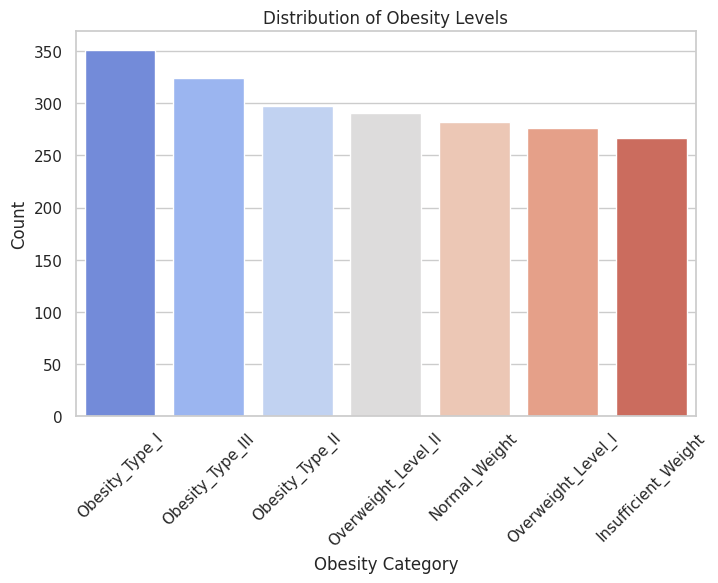

<ipython-input-20-4668be980712>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="Age", data=data, palette="coolwarm")


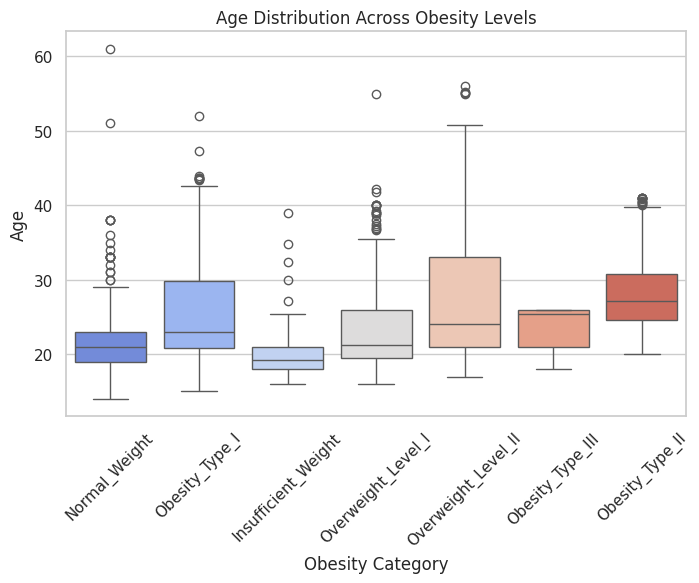

<ipython-input-20-4668be980712>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="FAF", data=data, palette="coolwarm")


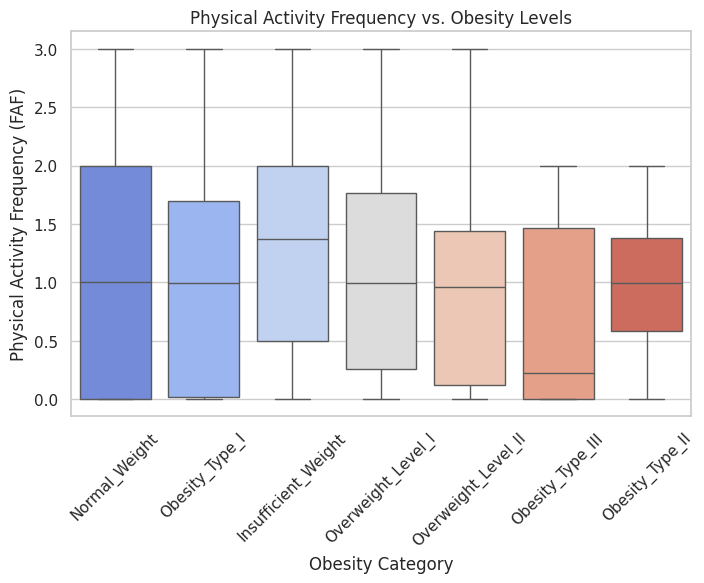

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Obesity Levels
plt.figure(figsize=(8, 5))
sns.countplot(x="NObeyesdad", data=data, palette="coolwarm", order=data["NObeyesdad"].value_counts().index)
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Influence of Age on Obesity
plt.figure(figsize=(8, 5))
sns.boxplot(x="NObeyesdad", y="Age", data=data, palette="coolwarm")
plt.title("Age Distribution Across Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

# 3. Relationship Between Physical Activity Frequency (FAF) and Obesity
plt.figure(figsize=(8, 5))
sns.boxplot(x="NObeyesdad", y="FAF", data=data, palette="coolwarm")
plt.title("Physical Activity Frequency vs. Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Physical Activity Frequency (FAF)")
plt.xticks(rotation=45)
plt.show()




<ipython-input-21-afdab7501af4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm")


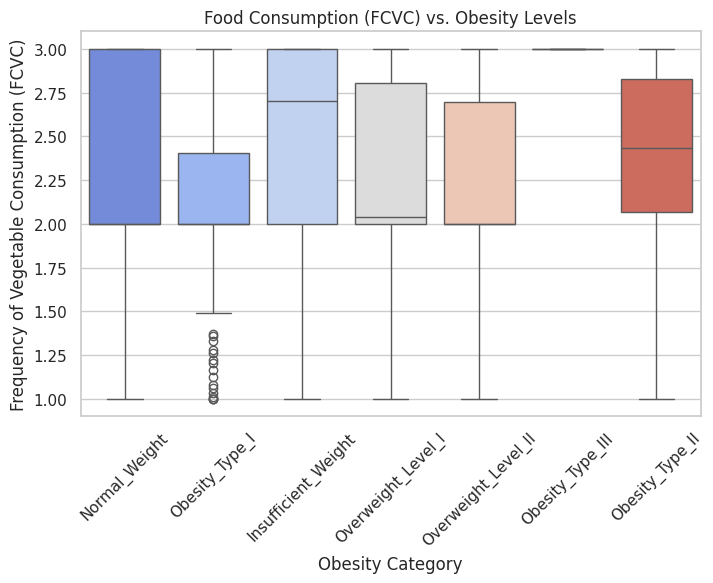

In [ ]:
# 4. Impact of Different Types of Food Consumption on Obesity
plt.figure(figsize=(8, 5))
sns.boxplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm")
plt.title("Food Consumption (FCVC) vs. Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Frequency of Vegetable Consumption (FCVC)")
plt.xticks(rotation=45)
plt.show()



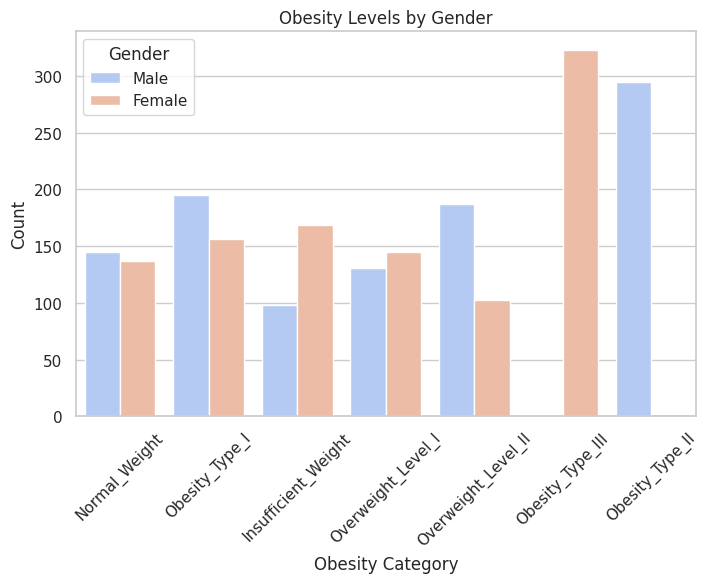

In [ ]:
# 5. Differences in Obesity Levels Based on Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="NObeyesdad", hue="Gender", data=data, palette="coolwarm")
plt.title("Obesity Levels by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

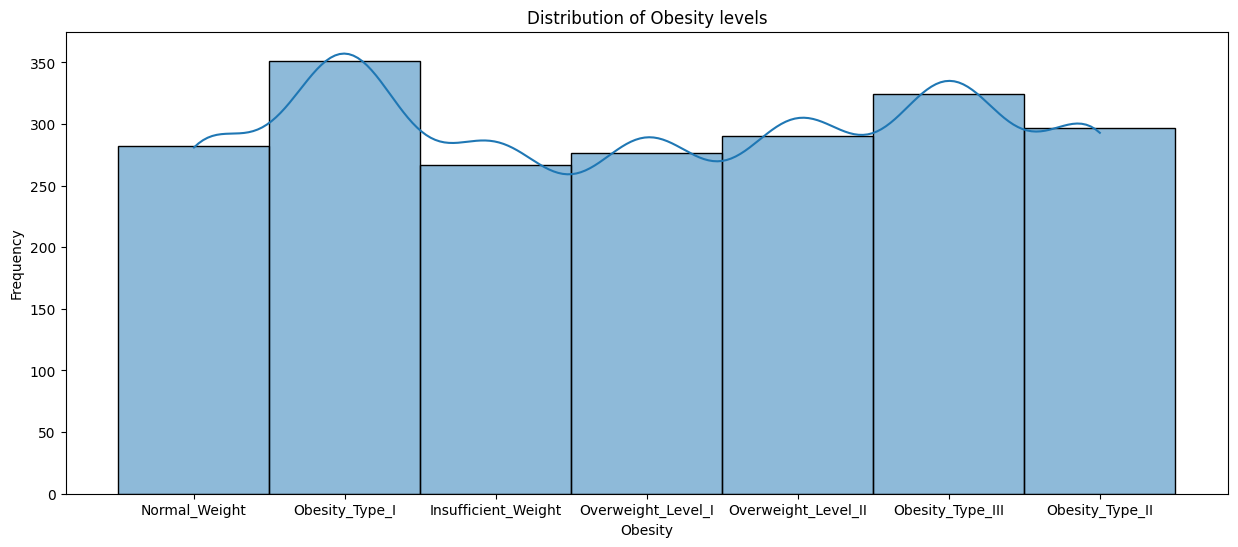

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable 'price'
plt.figure(figsize=(15,6))
sns.histplot(data['NObeyesdad'], kde=True, bins=30)
plt.title('Distribution of Obesity levels')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()


<ipython-input-27-1811da74b79f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm", inner="quartile")


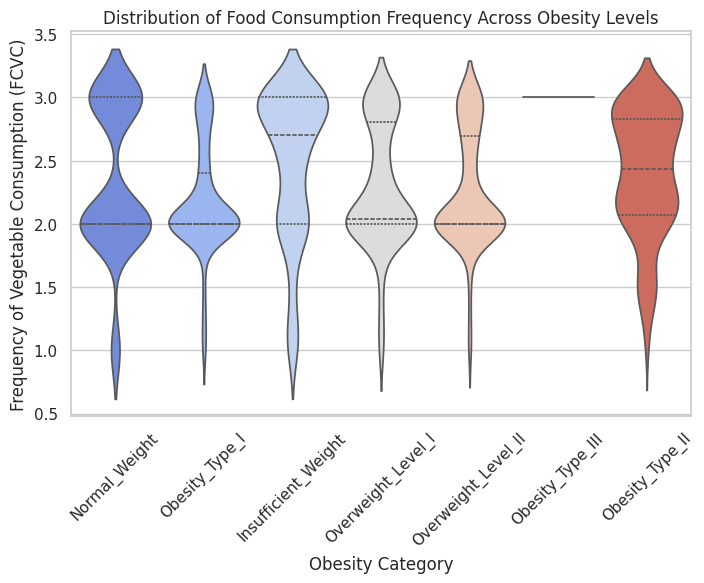

<ipython-input-27-1811da74b79f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm", alpha=0.6)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-pac

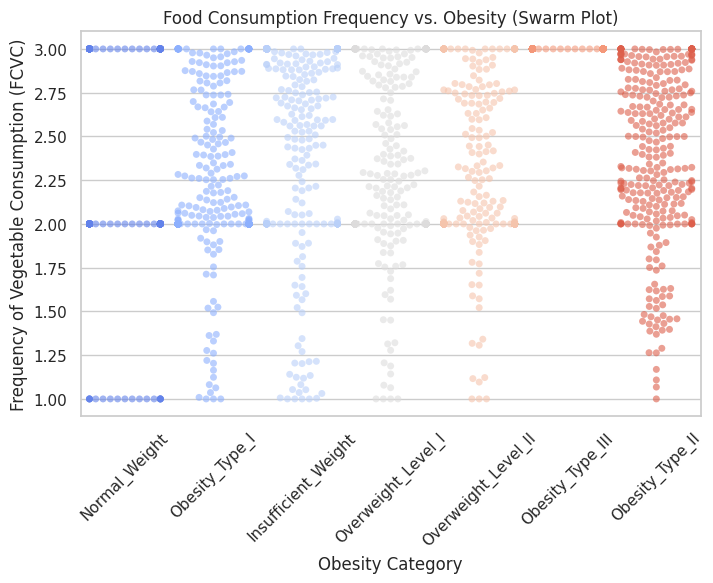

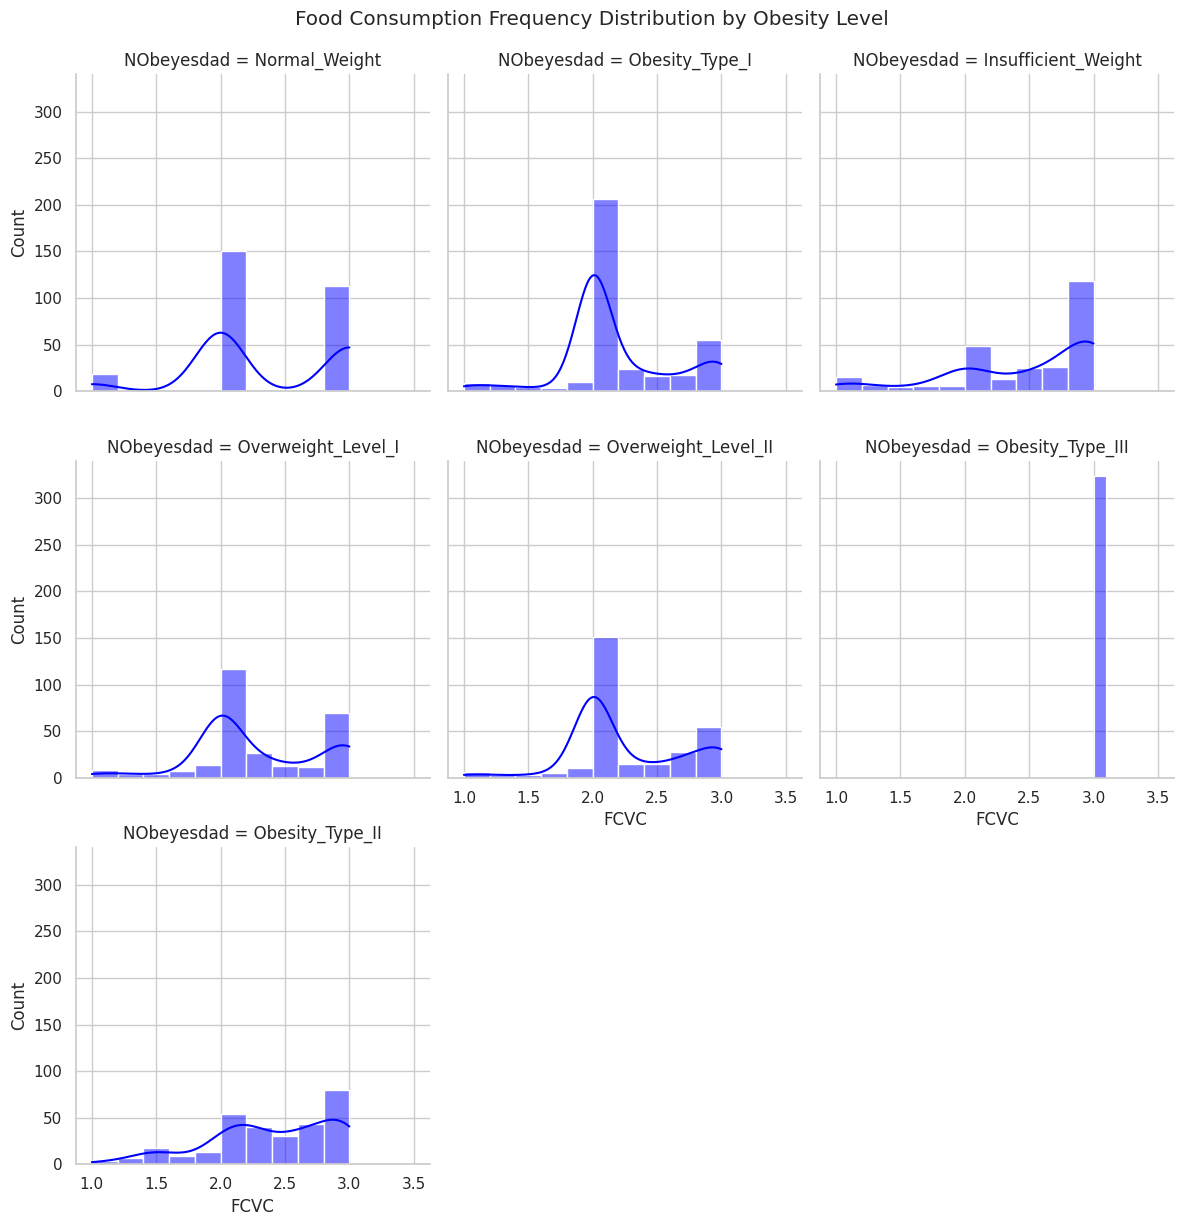

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for seaborn
sns.set(style="whitegrid")

# 1. Violin Plot for Food Consumption Frequency vs. Obesity
plt.figure(figsize=(8, 5))
sns.violinplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm", inner="quartile")
plt.title("Distribution of Food Consumption Frequency Across Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Frequency of Vegetable Consumption (FCVC)")
plt.xticks(rotation=45)
plt.show()

# 2. Swarm Plot for Food Consumption vs. Obesity
plt.figure(figsize=(8, 5))
sns.swarmplot(x="NObeyesdad", y="FCVC", data=data, palette="coolwarm", alpha=0.6)
plt.title("Food Consumption Frequency vs. Obesity (Swarm Plot)")
plt.xlabel("Obesity Category")
plt.ylabel("Frequency of Vegetable Consumption (FCVC)")
plt.xticks(rotation=45)
plt.show()

# 3. Facet Grid Histograms for Food Consumption
g = sns.FacetGrid(data, col="NObeyesdad", col_wrap=3, height=4, sharex=True)
g.map(sns.histplot, "FCVC", bins=10, kde=True, color="blue")
g.fig.suptitle("Food Consumption Frequency Distribution by Obesity Level", y=1.02)
plt.show()




# **Splitting into Training and Testing**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


# Step 1: Define Features (X) and Target (y)
X = data.drop(columns=["NObeyesdad"])  # Features (independent variables)
y = data["NObeyesdad"]  # Target variable (dependent variable)

# Step 2: Encode Categorical Features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()

# Apply One-Hot Encoding to categorical features and scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),   # Standardize numeric data
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)  # One-hot encode categorical data
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Step 3: Encode Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Print shapes of resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1669, 31) (1669,)
Testing set shape: (418, 31) (418,)


# **Build the Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Get number of features
input_shape = X_train.shape[1]
num_classes = len(np.unique(y_train))  # Number of obesity categories

# Convert target labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),  # Input layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(num_classes, activation='softmax')  # Output layer (softmax for multi-class classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,663 (57.28 KB)

 Trainable params: 14,663 (57.28 KB)

 Non-trainable params: 0 (0.00 B)

# **Train the Neural Network**

# **Explanation of Training Setup**
Epochs = 50: Controls how many times the model will see the dataset.
Batch Size = 32: Helps in stable gradient updates.
Validation Split = 20%: Ensures the model is tested on unseen data during training.
Early Stopping:
If validation loss doesn’t improve for 5 consecutive epochs, training stops.
Helps prevent overfitting.
Reduce Learning Rate on Plateau:
If validation loss stagnates for 3 epochs, learning rate is reduced by half.
Helps in fine-tuning model convergence.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train_categorical,
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per batch
    validation_split=0.2,  # 20% of training data used for validation
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2566 - loss: 1.8819 - val_accuracy: 0.5030 - val_loss: 1.5269 - learning_rate: 0.0010
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4414 - loss: 1.4636 - val_accuracy: 0.6497 - val_loss: 1.0585 - learning_rate: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5812 - loss: 1.0879 - val_accuracy: 0.7305 - val_loss: 0.7837 - learning_rate: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6772 - loss: 0.8377 - val_accuracy: 0.7814 - val_loss: 0.6211 - learning_rate: 0.0010
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 0.7022 - val_accuracy: 0.8353 - val_loss: 0.5151 - learning_rate: 0.0010
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7648 - loss: 0.5890 - val_accuracy: 0.8683 - val_loss: 0.4347 - learning_rate: 0.0010
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.5259 - val_accuracy:

# **Model's Evaluation**

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9448 - loss: 0.1494 
Test Accuracy: 0.9330
Test Loss: 0.1721
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.94      0.89        53
      Normal_Weight       0.91      0.75      0.83        57
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.84      0.98      0.91        55
Overweight_Level_II       0.95      0.91      0.93        58

           accuracy                           0.93       418
          macro avg       0.93      0.93      0.93       418
       weighted avg       0.94      0.93      0.93       418



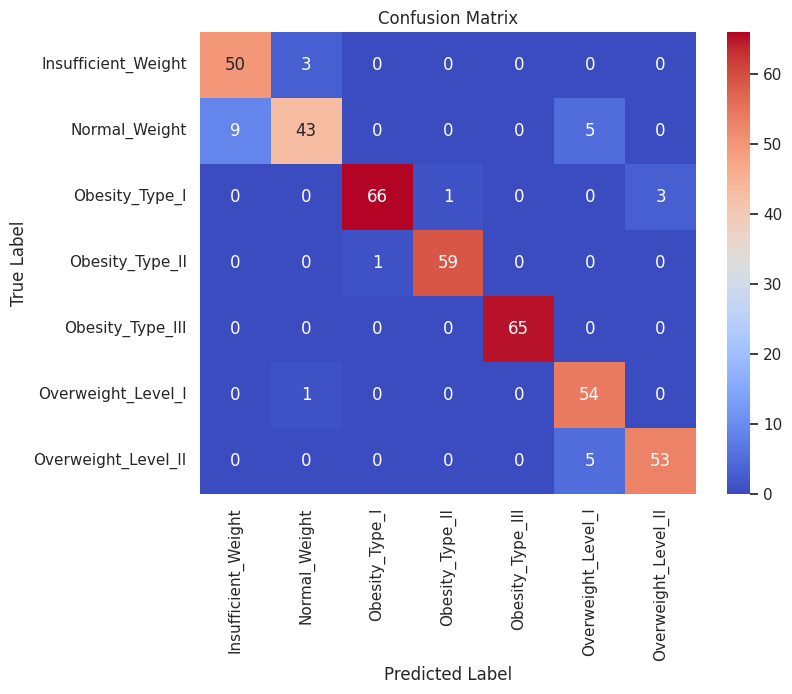

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict class probabilities for the test set
y_pred_probs = model.predict(X_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Overall Accuracy: 93%

The model correctly classifies 93% of the test data.
Indicates a strong predictive performance.
Class-Specific Performance

Obesity Type III (1.00 F1-score): Perfect classification, meaning all predictions for this class were correct.
Obesity Type I & II (0.96–0.98 F1-score): Very strong classification performance.
Normal Weight (0.83 F1-score): Lower recall (0.75), meaning some normal-weight individuals were misclassified.
Insufficient Weight (0.89 F1-score): Higher recall (0.94), meaning most actual underweight cases were correctly identified.
Precision vs. Recall

Higher Precision (Obesity Type I–III, Overweight Level II): Indicates low false positives (very few incorrect classifications).
Lower Recall (Normal Weight - 0.75): Some normal-weight individuals were misclassified into another category